In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



### 读取数据

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

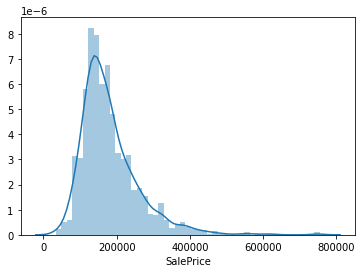

In [6]:
sns.distplot(data_train['SalePrice'])

In [7]:
print("Skewness :%f" % data_train["SalePrice"].skew())
print("Kurtosis :%f" % data_train["SalePrice"].kurt())

Skewness :1.882876
Kurtosis :6.536282


### 使用箱形图 进行特征分析 验证主要特征是否满足要求

(-0.5, 1.5, 0.0, 800000.0)

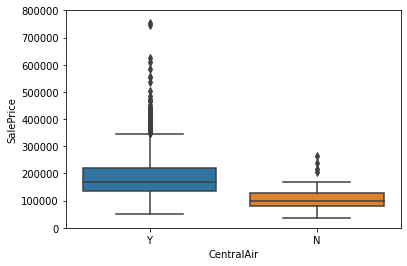

In [8]:
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

### 使用散点图 查看建造年份对销售几个的影响

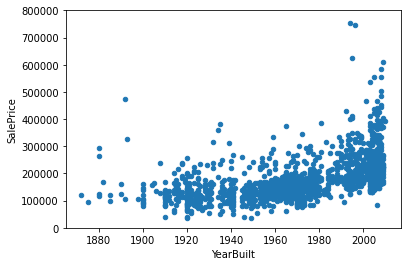

In [9]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

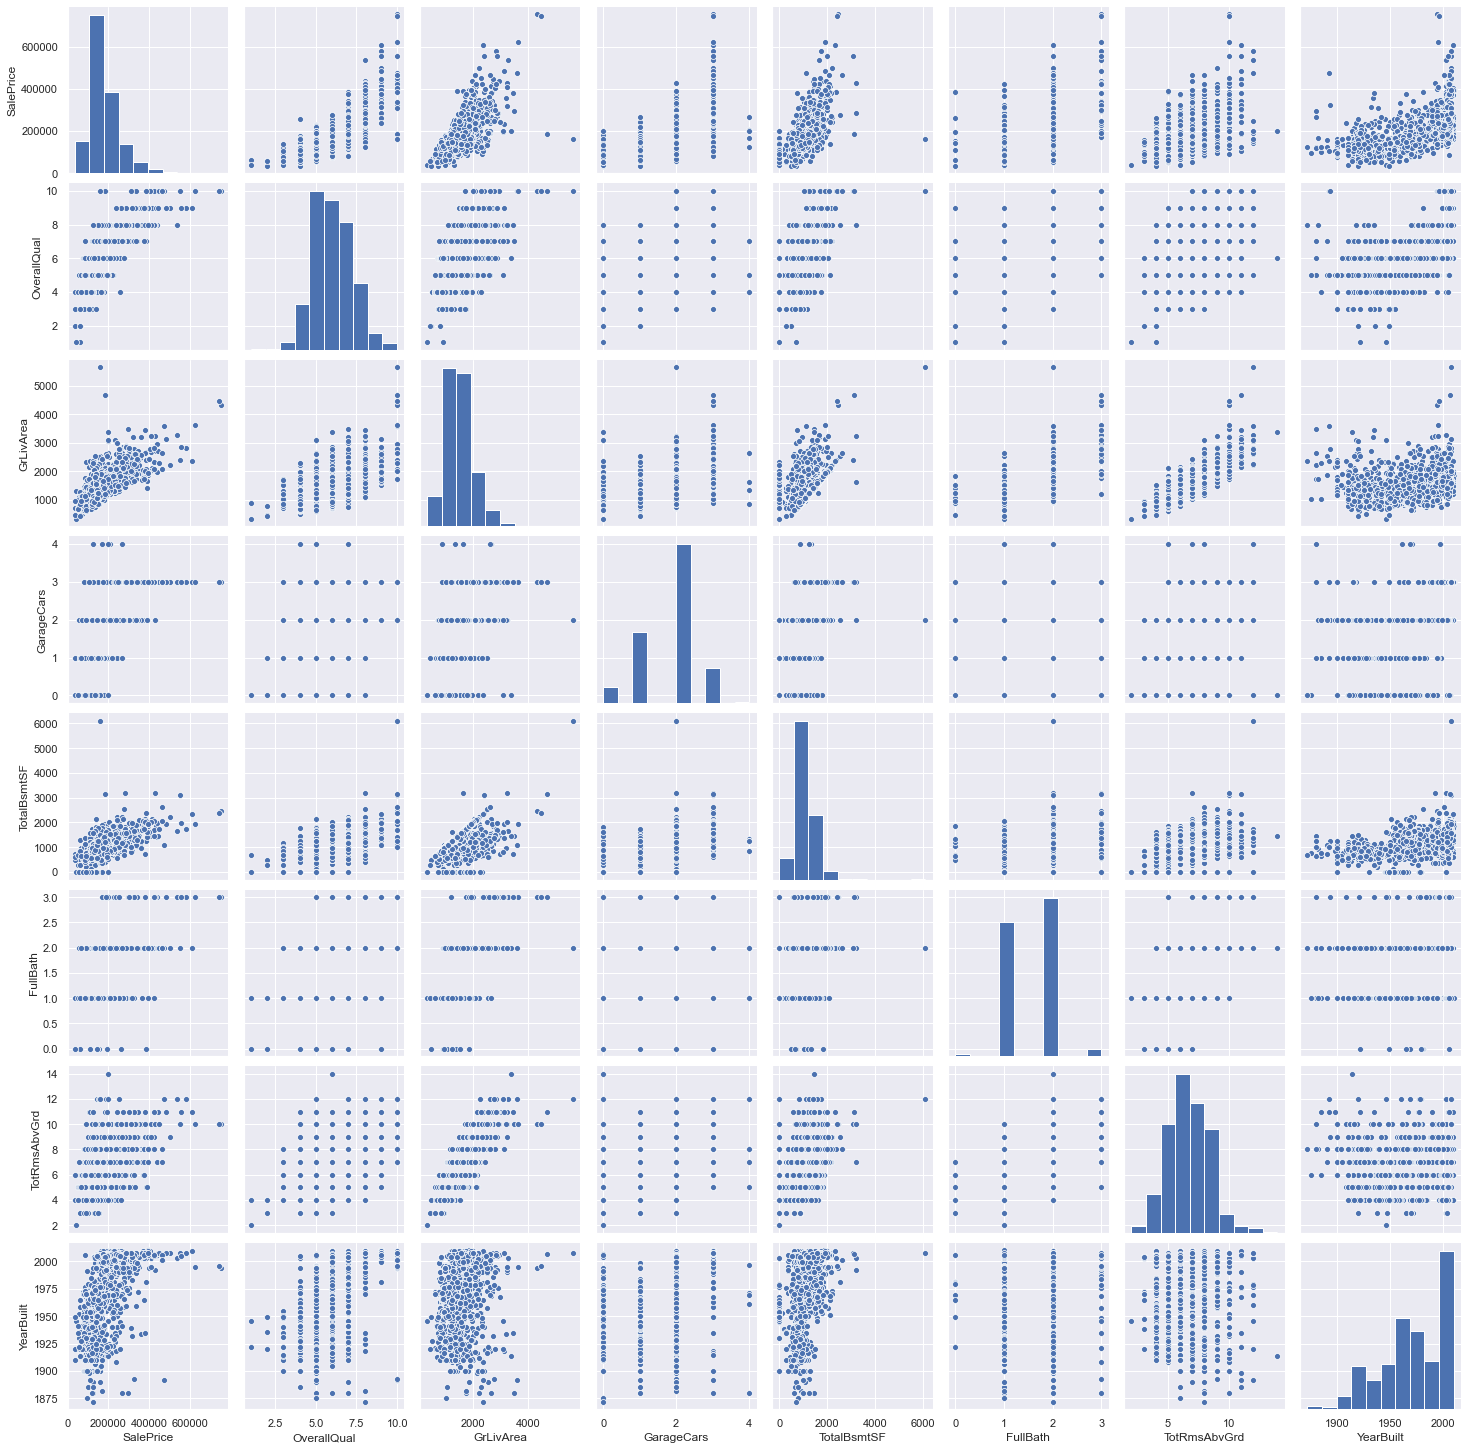

In [10]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size=2.5)
plt.show()



In [11]:
from sklearn import preprocessing
from sklearn import linear_model,svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = data_train[cols].values
Y = data_train['SalePrice'].values
X_scaled = preprocessing.StandardScaler().fit_transform(X)
Y_scaled = preprocessing.StandardScaler().fit_transform(Y.reshape(-1,1))
X_train, Y_train, X_test, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.33, random_state=42)


In [14]:
clfs = {
    'svm': svm.SVR(),
    'RandomForestRegression': RandomForestRegressor(n_estimators=400),
    'BayesianRidge': linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train, Y_train)
        y_pre = clfs[clf].predict(X_test)
        print(clf + 'cost:' + str(np.sum(y_pre-Y_test)/len(y_pre)))
    except Exception as e:
        print(clf + "error:")
        print(str(e))

svmerror:
y should be a 1d array, got an array of shape (482, 7) instead.
RandomForestRegressionerror:
Found input variables with inconsistent numbers of samples: [978, 482]
BayesianRidgeerror:
y should be a 1d array, got an array of shape (482, 7) instead.
